# 다음 분기에 어떤 게임을 설계해야 할까



지금은 2017년 1분기, 따라서 다음 분기는 2017년 2분기라고 가정한다.


### **0. 데이터 전처리**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
origin_df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv', index_col=0).reset_index(drop=True)
df = origin_df.copy()
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
df[df.isnull().any(axis=1)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
272,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
...,...,...,...,...,...,...,...,...,...
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0
16431,Cars: Mater-National Championship,X360,2007.0,NaN,THQ,0.13,0,0,0.01
16432,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01
16555,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0,0.03,0,0.01


In [ ]:
ch = {'Publisher' : 'Unknown'}
df = df.fillna(value = ch)

In [ ]:
df = df.dropna()
df.Year = df.Year.astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16277 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16277 non-null  object
 1   Platform     16277 non-null  object
 2   Year         16277 non-null  int64 
 3   Genre        16277 non-null  object
 4   Publisher    16277 non-null  object
 5   NA_Sales     16277 non-null  object
 6   EU_Sales     16277 non-null  object
 7   JP_Sales     16277 non-null  object
 8   Other_Sales  16277 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.2+ MB


In [ ]:
df.query('Year < 1900')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
74,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
81,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.1,0.07,0,0.01
213,NASCAR Unleashed,PS3,11,Racing,Activision,0.09,0,0,0.01
304,Kung Fu Panda: Showdown of Legendary Legends,PS3,15,Action,Little Orbit,0,0.02,0,0
768,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,0.53,0.41,0,0.14
...,...,...,...,...,...,...,...,...,...
15985,Sugoi Hebereke,SNES,94,Fighting,Sunsoft,0,0,0.02,0
16103,Fab 5 Soccer,DS,8,Sports,Destineer,0.01,0,0,0
16149,Dragon Ball Z: Burst Limit,X360,8,Fighting,Atari,0.24,0.18,0.03,0.05
16394,Point Blank 3,PS,0,Shooter,Namco Bandai Games,0.01,0.01,0,0


In [ ]:
def fix_wrong_year(df):
  for i, year in enumerate(df.Year):
    if year < 50 :
      df.iloc[i, 2] = df.iloc[i, 2] + 2000
    elif 50 <= year < 100 :
      df.iloc[i, 2] = df.iloc[i, 2] + 1900

fix_wrong_year(df)
df.query('Year<1900');

In [ ]:
del_year = df.query('Year>2016').index
df.drop(del_year, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

for i in sales: 
    df[i+'_K'] = df[i].str.contains('K')
    df[i] = df[i].replace('K', '', regex=True)
    df[i] = df[i].replace('M', '', regex=True).astype('float')

In [ ]:
sales_K = ['NA_Sales_K', 'EU_Sales_K', 'JP_Sales_K', 'Other_Sales_K']

for i in sales_K:
  df[i] = df[i].replace(True, 0.001, regex=True)
  df[i] = df[i].replace(False, 1, regex=True)

In [ ]:
for i, j in zip(sales, sales_K):
  df[i] = df[i] * df[j]

In [ ]:
df.drop(sales_K, axis=1, inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Sales'] = df.NA_Sales + df.EU_Sales + df.JP_Sales + df.Other_Sales

In [ ]:
df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16273 entries, 0 to 16272
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16273 non-null  object 
 1   Platform     16273 non-null  object 
 2   Year         16273 non-null  int64  
 3   Genre        16273 non-null  object 
 4   Publisher    16273 non-null  object 
 5   NA_Sales     16273 non-null  float64
 6   EU_Sales     16273 non-null  float64
 7   JP_Sales     16273 non-null  float64
 8   Other_Sales  16273 non-null  float64
 9   Sales        16273 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.2+ MB


---

### **1. 지역에 따라서 선호하는 게임 장르가 다를까?**

In [ ]:
genre_sales = df.iloc[:, 3:]
genre_sales.drop('Publisher', axis=1, inplace=True)
genre_sales

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
0,Action,0.04,0.00,0.00,0.00,0.04
1,Action,0.17,0.00,0.00,0.01,0.18
2,Adventure,0.00,0.00,0.02,0.00,0.02
3,Misc,0.04,0.00,0.00,0.00,0.04
4,Platform,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...
16268,Platform,0.15,0.04,0.00,0.01,0.20
16269,Action,0.01,0.00,0.00,0.00,0.01
16270,Sports,0.44,0.19,0.03,0.13,0.79
16271,Action,0.05,0.05,0.25,0.03,0.38


In [ ]:
sgm = genre_sales.groupby('Genre').mean().T.reset_index()
sgm

Genre,index,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,NA_Sales,0.264974,0.080252,0.263892,0.234774,0.509588,0.214427,0.290738,0.217732,0.448813,0.213632,0.290239,0.101328
1,EU_Sales,0.158482,0.050165,0.119641,0.123284,0.229577,0.089030,0.192648,0.125068,0.242367,0.133455,0.161361,0.067045
2,JP_Sales,0.048318,0.040858,0.104359,0.061103,0.149348,0.099189,0.046164,0.234214,0.029828,0.074929,0.058617,0.073284
3,Other_Sales,0.056770,0.013150,0.043293,0.042663,0.058867,0.021940,0.062713,0.038750,0.079578,0.036910,0.057569,0.016761
4,Sales,0.528544,0.184425,0.531186,0.461824,0.947380,0.424586,0.592262,0.615765,0.800586,0.458927,0.567786,0.258418


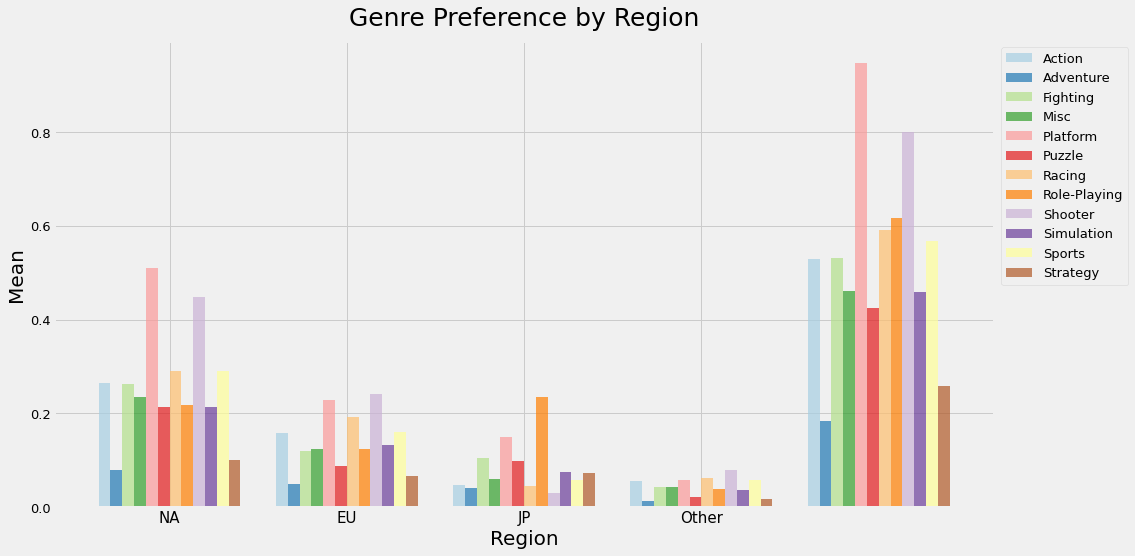

In [ ]:
sgm = genre_sales.groupby('Genre').mean().T

sgm.plot(kind='bar', figsize=(15,8), fontsize=13, alpha=0.7, width=0.8, color=sns.color_palette("Paired"))
plt.title('Genre Preference by Region', fontsize=25, pad=15)
plt.xlabel('Region', fontsize=20)
plt.ylabel('Mean', fontsize=20)
plt.xticks([0, 1, 2, 3], ['NA', 'EU', 'JP', 'Other'], rotation=0, fontsize=15)
plt.legend(bbox_to_anchor=(1.15, 1), fontsize=13)
plt.show()

In [ ]:
sgm

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,0.264974,0.080252,0.263892,0.234774,0.509588,0.214427,0.290738,0.217732,0.448813,0.213632,0.290239,0.101328
EU_Sales,0.158482,0.050165,0.119641,0.123284,0.229577,0.089030,0.192648,0.125068,0.242367,0.133455,0.161361,0.067045
JP_Sales,0.048318,0.040858,0.104359,0.061103,0.149348,0.099189,0.046164,0.234214,0.029828,0.074929,0.058617,0.073284
Other_Sales,0.056770,0.013150,0.043293,0.042663,0.058867,0.021940,0.062713,0.038750,0.079578,0.036910,0.057569,0.016761
Sales,0.528544,0.184425,0.531186,0.461824,0.947380,0.424586,0.592262,0.615765,0.800586,0.458927,0.567786,0.258418


위 그래프를 보아 NA에서는 Platform, Shooter 장르 순으로 강세를 보이고 있고,
EU에서는 Shooter, Platform 장르 순으로 강세를 보인다.<br>또한, JP 지역에서는 Role-Playing 장르가 초강세를 보인다. 따라서, 지역에 따라서 선호하는 게임 장르가 차이가 있음을 알 수 있다. 그러나, NA와 EU는 조금의 차이가 있지만 선호하는 장르가 비슷한 양상을 띄고 있음도 알 수 있다.

---

### **2. 연도별 게임의 트렌드가 있을까?**

In [ ]:
pgys = df.iloc[:, 1:]
pgys.drop('Publisher', axis=1, inplace=True)
pgys.drop(sales, axis=1, inplace=True)
pgys

,Platform,Year,Genre,Sales
0,DS,2008,Action,0.04
1,Wii,2009,Action,0.18
2,PSP,2010,Adventure,0.02
3,DS,2010,Misc,0.04
4,PS3,2010,Platform,0.25
...,...,...,...,...
16268,GC,2006,Platform,0.20
16269,PSP,2005,Action,0.01
16270,PS3,2015,Sports,0.79
16271,PSV,2013,Action,0.38


In [ ]:
gy = pgys.iloc[:, 1:]
py = pgys.drop('Genre', axis=1)

In [ ]:
gym = gy.groupby(['Year', 'Genre'])['Sales'].mean().unstack('Genre')
gym19 = gym.query('Year <= 2000')
gym20 = gym.query('2000 < Year')

In [ ]:
# color1 = sns.choose_colorbrewer_palette('sequential')

In [ ]:
color1 = ['khaki', 'gold', 'goldenrod', 'limegreen', 'darkseagreen', 
          'darkgreen', 'lightsteelblue', 'cornflowerblue', 'royalblue', 'mediumblue', 
          'navy', 'indigo']

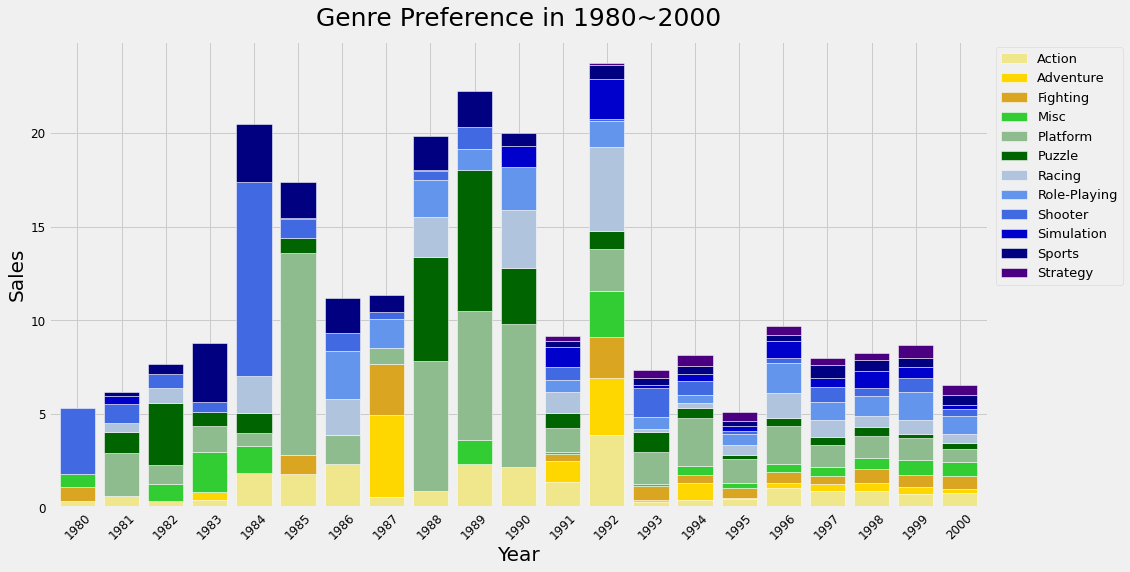

In [ ]:
plt.style.use('fivethirtyeight')
gym19.plot(kind='bar', stacked=True, figsize=(15, 8), width=0.8, color=color1, edgecolor='w')
plt.title('Genre Preference in 1980~2000', fontsize=25, pad=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(1.15, 1), fontsize=13)
plt.show()

In [ ]:
# plt.style.use('fivethirtyeight')
# fig, ax = plt.subplots(figsize=(15, 8))
# sns.barplot(data=gym19, x='Year', y='Sales', hue='Genre', ax=ax, dodge=False, palette = 'viridis', edgecolor='white')
# plt.title('Genre Preference in 1980~2000', fontsize=25, pad=15)
# plt.xlabel('Year', fontsize=20)
# plt.ylabel('Sales', fontsize=20)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.legend(bbox_to_anchor=(1.15, 1), fontsize=13)
# plt.show()

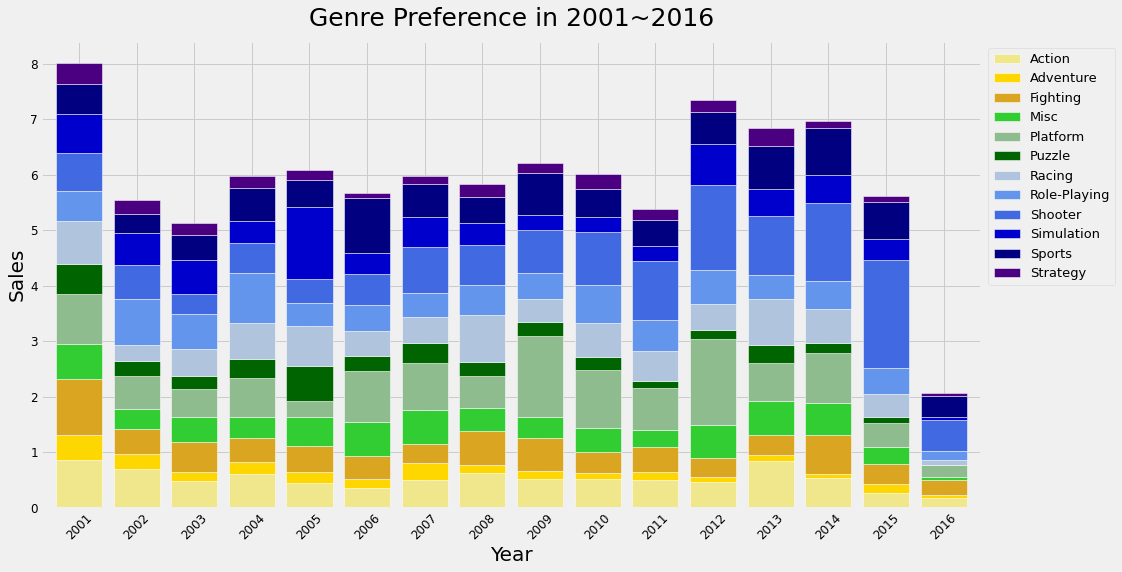

In [ ]:
gym20.plot(kind='bar', stacked=True, figsize=(15, 8), width=0.8, color=color1, edgecolor='w')
plt.title('Genre Preference in 2001~2016', fontsize=25, pad=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(1.15, 1), fontsize=13)
plt.show()

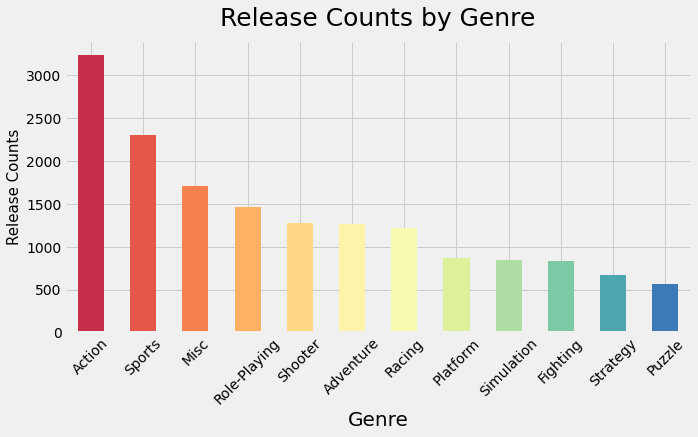

In [ ]:
genre_counts = df.value_counts('Genre')

genre_counts.plot(kind='bar', figsize=(10, 5), color=sns.color_palette("Spectral", 12))
plt.title('Release Counts by Genre', fontsize=25, pad=15)
plt.xlabel('Genre', fontsize=20)
plt.ylabel('Release Counts', fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [ ]:
pym = py.groupby(['Year', 'Platform'])['Sales'].mean().unstack('Platform')
pym19 = pym.query('Year <= 2000')
pym20 = pym.query('2000 < Year')

In [ ]:
color2 = ['rosybrown', 'lightcoral', 'indianred', 'brown', 'tab:red',
          'sandybrown', 'peru', 'tab:orange','chocolate',
          'lemonchiffon', 'yellow', 'khaki', 'gold', 'goldenrod',
          'greenyellow', 'darkseagreen', 'limegreen', 'forestgreen', 'darkgreen',
          'lightcyan', 'lightskyblue', 'skyblue', 'deepskyblue', 'dodgerblue',
          'lightsteelblue', 'cornflowerblue', 'royalblue', 'mediumblue', 'navy',
          'tab:purple', 'indigo']

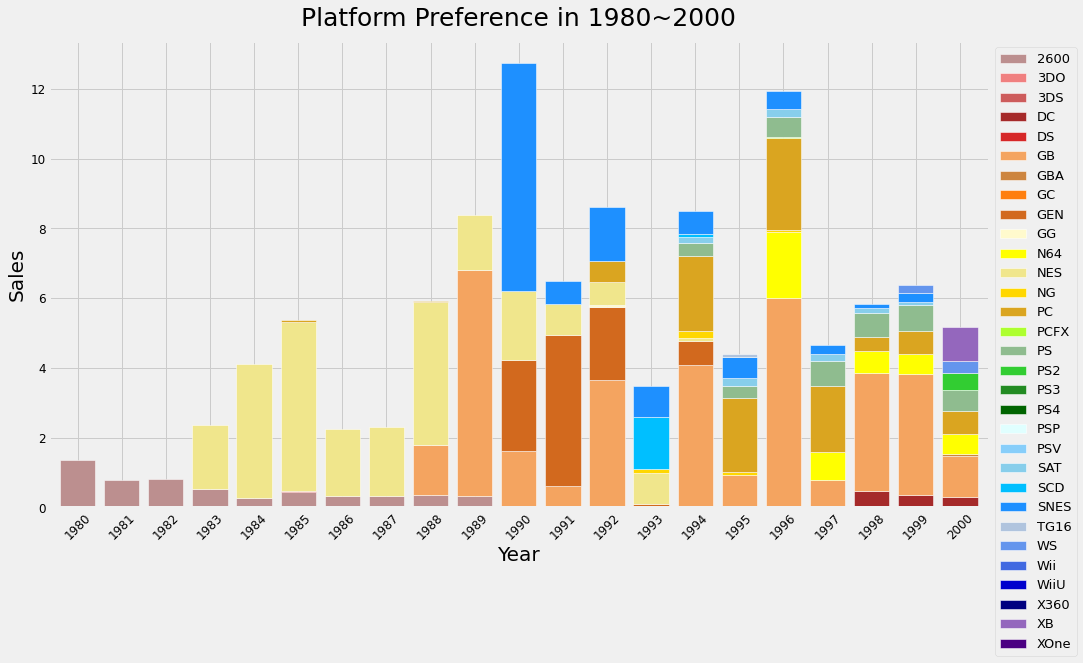

In [ ]:
pym19.plot(kind='bar', stacked=True, figsize=(15, 8), width=0.8, color = color2, edgecolor='w')
plt.title('Platform Preference in 1980~2000', fontsize=25, pad=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), fontsize=13)
plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(15, 8))
# sns.barplot(data=pym19, x='Year', y='Sales', hue='Platform', ax=ax, dodge=False, palette = 'Spectral', edgecolor='k')
# plt.title('Platform Preference in 1980~2000', fontsize=25, pad=15)
# plt.xlabel('Year', fontsize=20)
# plt.ylabel('Sales', fontsize=20)
# plt.xticks(fontsize=12, rotation=45)
# plt.yticks(fontsize=12)
# plt.legend(bbox_to_anchor=(1.15, 1), fontsize=13)
# plt.show()

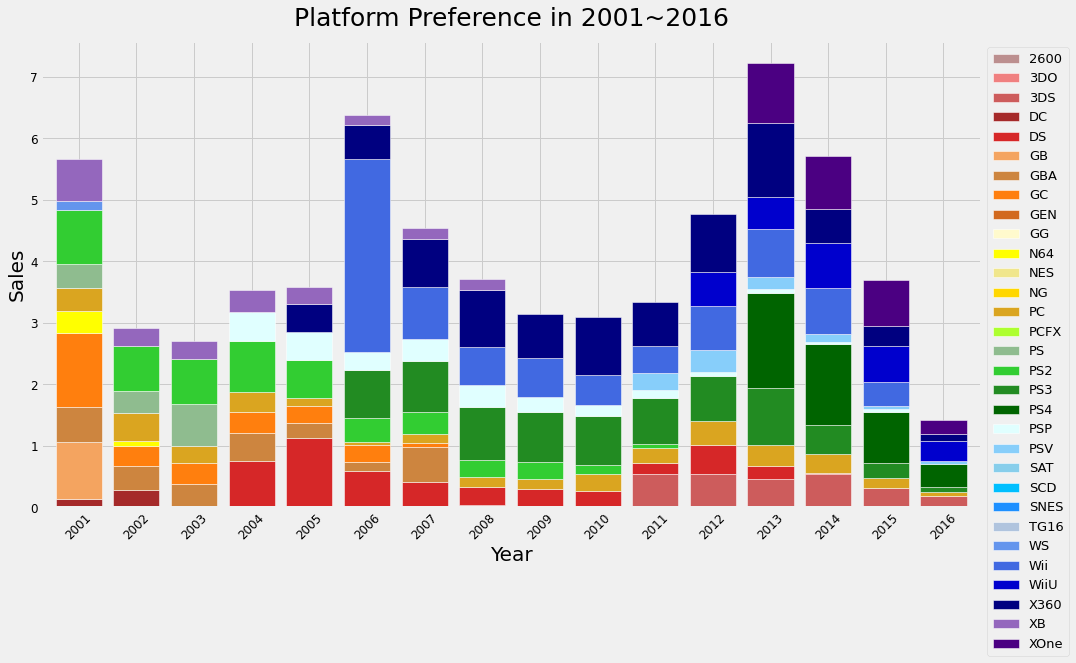

In [ ]:
pym20.plot(kind='bar', stacked=True, figsize=(15, 8), width=0.8, color = color2, edgecolor='w')
plt.title('Platform Preference in 2001~2016', fontsize=25, pad=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), fontsize=13)
plt.show()

위 그래프들을 보면 전세계 판매량을 기준으로 연도별 게임 장르 트렌드와 플랫폼 트렌드를 확인할 수 있다. 
먼저 장르별 트렌드를 살펴보자.
우선 2000년대 이전에는 초반에 Shooter 장르가 유행하다가 이후 Platform 강세를 보인다. 그리고 1993년부터 다양한 장르의 게임들이 출시하기 시작했고, 후반에는 Role-Playing 장르가 유행하기 시작함을 볼 수 있다. 
그리고 2000년대 이후에는 다양한 장르가 고르게 판매가 됨을 볼 수 있다. 그 중 Platform 장르와 Role-Playing 장르가 우세하다. 이후 2010년부터 Shooting 장르가 점점 비중이 커지더니 1위가 되었음을 알 수 있다. Action 장르는 트렌드에 상관없이 꾸준히 판매된다. 그 이유는 바로 'Release Counts by Genre' 그래프를 보면 알 수 있는데, 이는 출시되는 양이 매우 많기 때문이다. 하지만 무난한 판매량이고, 이로 보아 출시 양이 많다고 판매량에 영향을 주지않는다는 것이다.

그 다음으로 플랫폼별 트렌드를 살펴보자.
80초반에 ‘2600’을 시작으로 NES와 GB가 강세를 보인다. SNES는 첫 출시에 최고 판매량을 찍고 하락했다. 그리고 새로운 플랫폼이 생길수록 선호도가 낮아진다. 예를 들어, PS 이후에 PS2, 3, 4 등 버전이 업그레이드 될수록 그 전 버전은 줄어드는 것을 볼 수 있다. 즉, 플랫폼은 게임에 대한 트렌드라기보다는 시간이 지날수록 새로운 플랫폼이 나오면 그 플랫폼으로 이동하는 것으로 유추할 수 있다.

#### ※ Genre Preference by Platform (그냥 만듬)

In [ ]:
pgysm = np.round(pgys.groupby(['Year', 'Platform', 'Genre'], as_index=False).mean(), 3)
pgysm19 = pgysm.query('Year <= 2000').sort_values(by = 'Year')
pgysm20 = pgysm.query('2000 < Year').sort_values(by = 'Year')

In [ ]:
import plotly.express as px

fig19 = px.sunburst(pgysm19, path=['Year', 'Platform', 'Genre'], values='Sales')
fig19.update_layout(margin = dict(t=60, l=0, r=0, b=30),
                    title={'text': "Genre Preference by Platform in 1980~2000",
                          'y':0.95,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'})
fig19.show()

In [ ]:
fig20 = px.sunburst(pgysm20, path=['Year', 'Platform', 'Genre'], values='Sales')
fig20.update_layout(margin = dict(t=60, l=0, r=0, b=30),
                    title={'text': "Genre Preference by Platform in 2001~2016",
                          'y':0.95,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'})
fig20.show()

### **3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

In [ ]:
game_sales = df.drop(sales, axis=1)
game_sales

,Name,Platform,Year,Genre,Publisher,Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.25
...,...,...,...,...,...,...
16268,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.20
16269,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01
16270,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.79
16271,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.38


In [ ]:
sales_by_name = game_sales.groupby('Name', as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False).reset_index(drop=True)
top10_df = sales_by_name.head(10)
top10_df

,Name,Sales
0,Wii Sports,82.74
1,Grand Theft Auto V,55.92
2,Super Mario Bros.,45.31
3,Tetris,35.84
4,Mario Kart Wii,35.83
5,Wii Sports Resort,33.00
6,Pokemon Red/Pokemon Blue,31.38
7,Call of Duty: Modern Warfare 3,30.84
8,New Super Mario Bros.,30.01
9,Call of Duty: Black Ops II,29.73


In [ ]:
top10 = top10_df.Name.unique()
top10_info = game_sales[game_sales['Name'].isin(top10)].reset_index(drop=True)
top10_info

,Name,Platform,Year,Genre,Publisher,Sales
0,Tetris,GB,1989,Puzzle,Nintendo,30.26
1,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,11.99
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,14.76
3,Wii Sports,Wii,2006,Sports,Nintendo,82.74
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,33.00
5,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,21.39
6,Super Mario Bros.,NES,1985,Platform,Nintendo,40.24
7,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,14.04
8,Call of Duty: Modern Warfare 3,Wii,2011,Shooter,Activision,0.89
9,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,13.74


In [ ]:
publisher = px.sunburst(top10_info, path=['Publisher', 'Name', 'Platform'], values='Sales')
publisher.update_layout(margin = dict(t=60, l=0, r=0, b=30),
                    title={'text': "Top10 Game's Publisher",
                          'y':0.95,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'})
publisher.show()

In [ ]:
top10_pie = px.sunburst(top10_info, path=['Genre', 'Name', 'Platform'], values='Sales')
top10_pie.update_layout(margin = dict(t=60, l=0, r=0, b=30),
                    title={'text': "Top10 Game's Genre",
                          'y':0.95,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'})
top10_pie.show()

In [ ]:
top10_pie = px.sunburst(top10_info, path=['Name', 'Genre', 'Year', 'Platform'], values='Sales')
top10_pie.update_layout(margin = dict(t=60, l=0, r=0, b=30),
                    title={'text': "Top10 Analysis",
                          'y':0.95,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'})
top10_pie.show()

출고량이 높은 10개의 게임을 분석하여 보자. 우리는 위에서 새로운 플랫폼이 출시되면 소비자들이 그곳으로 이동한다는 것을 보았다. 그리고 그 플랫폼에서만 이용할 수 있도록 출시되는 게임들이 있다. 대표적인 것이 바로 판매량 1위인 ‘Wii Sports’이다. 다른 게임들은 여러 플랫폼에 출시한 것에 비해 Nintendo의 게임들은 오직 자체 플랫폼에서만 게임을 할 수 있다. 그리고 특히, Wii는 처음 출시되었을 때 모션 센서가 적용된 "체감형" 컨트롤러로 게임계에 새 바람을 불어왔다. 이 새로운 방식의 컨트롤러와 전부터 사랑받던 Nintendo의 게임의 결합은 사람들로 하여금 큰 관심을 받았고, 그로 인해 판매량이 압도적으로 상승하여 1위에 안착하였다.
그리고 위에서 보았던 연도별 트렌드의 상위권 장르와 실제 Top 10 게임의 장르가 상이하다는 것을 알 수 있다.

연도별로 쭉 강세였던 Role-Playing 장르는 실제로 Top 10에서는 1가지 밖에 존재하지 않는다. 하지만 이는 데이터의 문제로 볼 수 있다. ‘Witcher 3’와 ‘Fallout 4’라는 게임을 예로 살펴보자. 위 두 게임은 데이터에서 Role-Palying 장르라고 되어있지만, 소비자들 사이에서는 Action 장르라는 인식이 더 강하다. 실제로 위 두 게임을 쳐보면 실제로는 Action Role-Palying 장르이다. 위 게임 말고도 ‘슈퍼마리오’의 경우도 ‘Platform’이 아니라 ‘Action’, ‘콜오브듀티’는 Shooter가 아니라 ‘FPS’다. 가장 중요한 장르인 ‘FPS’라는 카테고리도 빠져있다는 것도 문제로 보인다. 게다가 ‘GTA’가 ‘Action’이라는 장르 하나만 가지고 있는 것이 아니라 실제로는 ‘오픈월드 액션 어드벤처’인 것 처럼 게임은 가지고 있는 장르가 하나가 아니라 여러 장르를 포함하고 있다. 즉, 이 데이터의 장르 칼럼은 참고만 하면서 게임 자체를 보고 소비자들이 인식하고 있는 장르를 파악하여야한다.

그렇게 보았을 때, Top10에는 Action, Fps, 오픈월드 장르가 강세임을 알 수 있다. 이러한 장르를 방향성으로 삼고, Wii처럼 획기적인 플랫폼을 개발하거나 오랜 시간 사랑 받는 캐릭터를 제작하는 것을 목표로 가져가야한다. 


### 4. 모바일 플랫폼에 대한 SWOT 분석

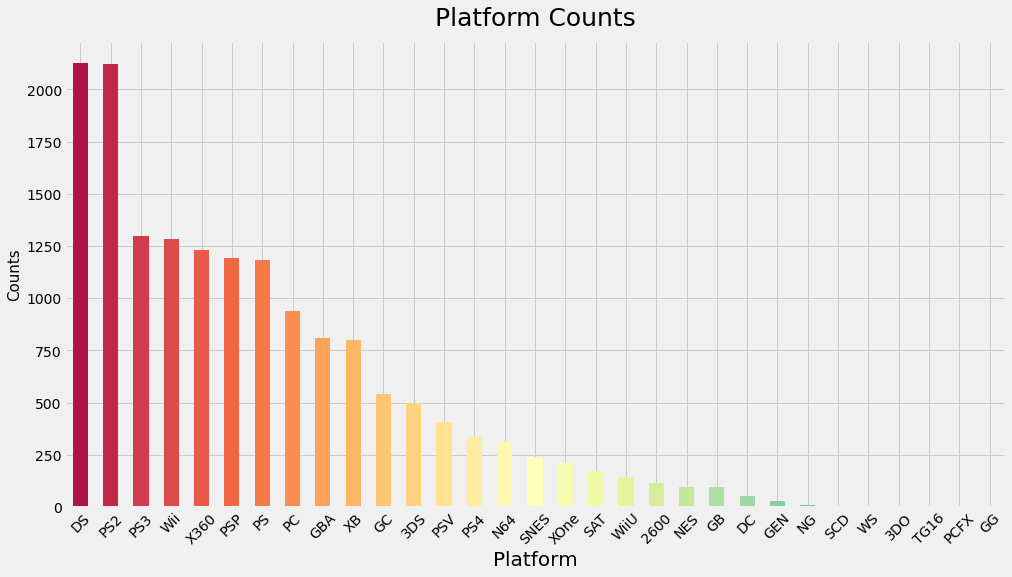

In [ ]:
platform_counts = df.value_counts('Platform')

platform_counts.plot(kind='bar', figsize=(15, 8), color=sns.color_palette("Spectral", 31))
plt.title('Platform Counts', fontsize=25, pad=15)
plt.xlabel('Platform', fontsize=20)
plt.ylabel('Counts', fontsize=15)
plt.xticks(rotation=45)
plt.show()

앞서 소비자들은 새로운 플랫폼이 나오면 그곳으로 이동한다는 것을 알았다. 따라서, 새로운 플랫폼에서 게임을 개발할 필요가 있다고 생각한다. 그 대상으로 모바일을 삼는다. 그에 따라, 모바일 플랫폼에 대하여 SWOT 분석을 실시한다. SWOT 분석에서 Strong과 Weakness는 내부적 요인에서의 강점과 약점, Opportunity와 Threat는 외부적 요인에서의 기회와 위기를 이야기한다.

- Strong
1. 접근성 – 요즘에는 컴퓨터나 콘솔이 없는 사람은 많지만 핸드폰이 없는 사람을 찾아보기가 힘들다. PC나 컴퓨터가 없어도 남녀노소 누구나 게임에 쉽게 접근할 수 있다. 
2. 기기 최적화 - 하드웨어만 업그레이드 될 뿐 플랫폼 자체가 바뀔 여지는 없다. 또한, 향후 기술이 발달하여 모바일 게임에 최적화된 성능을 가지게 될 것이다.


- Weakness
1. 조작감
2. 그래픽
3. 용량
4. 버그


- Opportunity 
1. 블루오션 플랫폼 - 위 'Platform Counts' 그래프를 보면 굉장히 많은 플랫폼이 존재하나 모바일에 관한 데이터는 찾아볼 수 없다. 이는 그 틈새를 들어갈 수 있음을 의미한다.
2. 모바일 게임 시장의 성장과 선호도 증가 
3. 다른 모바일 게임들의 사례들 – 아직 완벽히 성공했다고 말할 수 있는, 알려진 모바일 게임들이 존재하지 않는다. 다양한 모바일 게임들의 단점들을 분석하여 우리의 게임에 적용할 수 있다.


- Threat
1. 양산화 되는 모바일 게임들 - 이미 여러 회사에서 모바일 게임들을 출시하기 시작하고 있다.


### 5. 결론

위 SWOT 분석을 바탕으로 우리는 모바일 플랫폼에서의 게임을 개발하여야 한다. 또한, 게임들이 여러 플랫폼에서 출시되는 만큼 모바일 게임 또한 온라인이라는 특성을 살려 다른 플랫폼과 연동이 되도록 만든다. 한 개의 아이디만 있다면 모바일, PC, 콘솔 등에서 연동하여 이용할 수 있도록 한다.
또한, 게임은 위 3번의 분석을 바탕으로 남녀노소가 즐길 수 있는 Action Openworld Adventure 장르를 베이스로 탄탄한 스토리가 바탕이 되어야한다. 소비자들은 세계관과 스토리에 열망하며 그 세계에 있다는 듯한 경험이 그들로 하여금 더욱더 게임을 향유하기 때문이다.
